In [1]:
import os 

#### The resnet GPU Energy consumption 

In [2]:
Resnet_CPU_4GPU_PATH = "./GPU_resnet_four_GPU.csv"
Resnet_CPU_3GPU_PATH = "./GPU_resnet_three_GPU.csv"
Resnet_CPU_2GPU_PATH = "./GPU_resnet_two_GPU.csv"
Resnet_CPU_1GPU_PATH = "./GPU_resnet_one_GPU.csv"

In [3]:
def readfile(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 10:
        line = file1.readline()
        if not line:
            break
        print(line)
        count += 1
    
    file1.close()

In [4]:
readfile(Resnet_CPU_4GPU_PATH)

Number of GPUs 4

Time, device, gpu_util(%), gpu_mem(%), memory_used/total(Mib), power_current/limit(W), temperature(C), Frequency(MHz)

23:09:36.085689, 0, 0, 0, 1/11019, 10.125/250.0, 48, 300

23:09:36.095119, 1, 0, 0, 1/11019, 21.576/250.0, 49, 300

23:09:36.108137, 2, 0, 0, 1/11019, 6.8100000000000005/250.0, 58, 300

23:09:36.117306, 3, 0, 0, 99/11016, 30.039/250.0, 66, 300

23:09:37.121672, 0, 0, 0, 1/11019, 9.861/250.0, 48, 300

23:09:37.125664, 1, 0, 0, 1/11019, 21.665/250.0, 49, 300

23:09:37.129019, 2, 0, 0, 1/11019, 7.227/250.0, 57, 300

23:09:37.131806, 3, 0, 0, 99/11016, 29.906000000000002/250.0, 65, 300



In [5]:
import matplotlib.pyplot as plt
def draw_GPU_Usage(filename, name):
    file1 = open(filename, 'r')
    count = 0
    gpu0_usage = []
    gpu1_usage = []
    gpu2_usage = []
    gpu3_usage = []
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 2:
            line = line.split(',')
            usage = []
            for item in line:
                usage.append(item.split())
            if usage[1] == ['0']:
                gpu0_usage.append(int(usage[2][0]))
            if usage[1] == ['1']:
                gpu1_usage.append(int(usage[2][0]))
            if usage[1] == ['2']:
                gpu2_usage.append(int(usage[2][0]))
            if usage[1] == ['3']:
                gpu3_usage.append(int(usage[2][0]))
    file1.close()

    plt.figure(figsize=(15, 4))
    plt.plot(gpu0_usage, linewidth=1, color = 'red', label = 'gpu0')
    plt.plot(gpu1_usage, linewidth=1, color = 'blue', label = 'gpu1')
    plt.plot(gpu2_usage, linewidth=1, color = 'green', label = 'gpu2')
    plt.plot(gpu3_usage, linewidth=1, color = 'yellow', label = 'gpu3')

    plt.xlabel('Time (s)')
    plt.ylabel('GPU usage %')
    plt.legend()
    plt.savefig(name + '.png')
    plt.show()

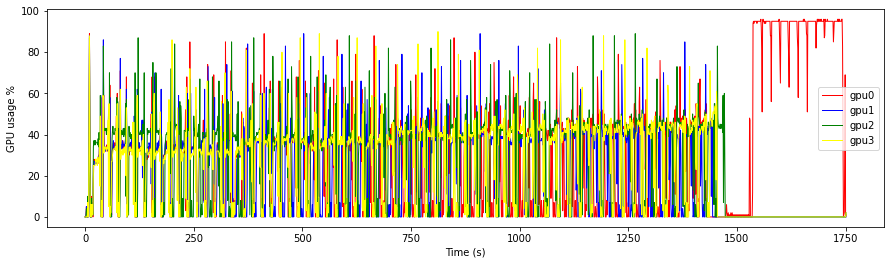

In [6]:
draw_GPU_Usage(Resnet_CPU_4GPU_PATH, 'Resnet_CPU_4GPU')

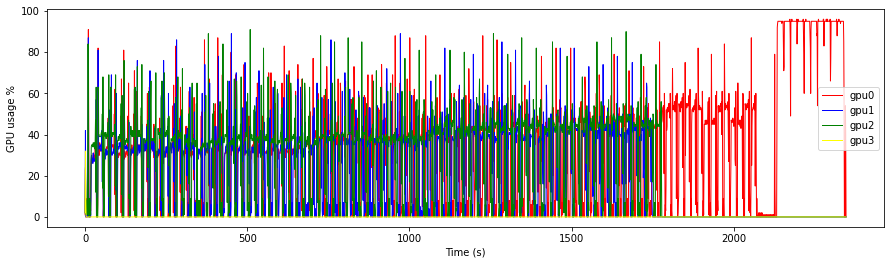

In [7]:
draw_GPU_Usage(Resnet_CPU_3GPU_PATH, 'Resnet_CPU_3GPU')

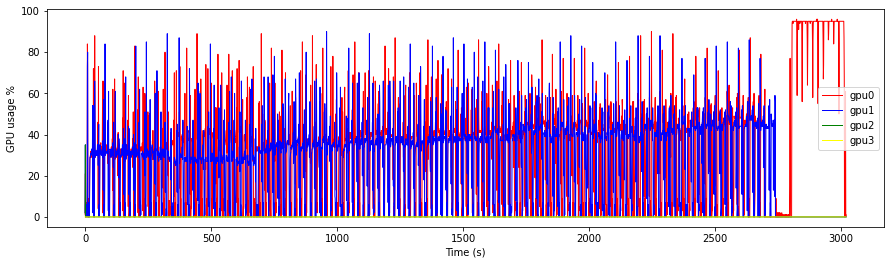

In [8]:
draw_GPU_Usage(Resnet_CPU_2GPU_PATH, 'Resnet_CPU_2GPU')

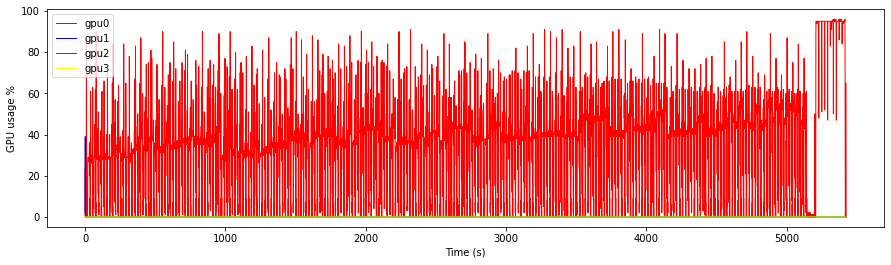

In [9]:
draw_GPU_Usage(Resnet_CPU_1GPU_PATH, 'Resnet_CPU_1GPU')

### GPU power consumption 

In [15]:
def sum_GPU_Energy(filename):
    file1 = open(filename, 'r')
    count = 0

    gpu0_power_sum = 0
    gpu1_power_sum = 0
    gpu2_power_sum = 0
    gpu3_power_sum = 0

    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 2:
            line = line.split(',')
            usage = []
            for item in line:
                usage.append(item.split())

            if usage[1] == ['0']:
                power = float(usage[5][0].split('/')[0])
                gpu0_power_sum += power if power >= 0 and power < 275 else print(power)
                #gpu0_power_sum.append(float(usage[5][0].split('/')[0]))
            if usage[1] == ['1']:
                power = float(usage[5][0].split('/')[0])
                gpu1_power_sum += power if power >= 0 and power < 275 else print(power)
                #gpu1_power_sum.append(float(usage[5][0].split('/')[0]))
            if usage[1] == ['2']:
                power = float(usage[5][0].split('/')[0])
                gpu2_power_sum += power if power >= 0 and power < 275 else print(power)
                #gpu2_power_sum.append(float(usage[5][0].split('/')[0]))
            if usage[1] == ['3']:
                power = float(usage[5][0].split('/')[0])
                gpu3_power_sum += power if power >= 0 and power < 275 else print(power)
                #gpu3_power_sum.append(float(usage[5][0].split('/')[0]))        
    
    print("gpu0_power = {} gpu average power {}".format(gpu0_power_sum, gpu0_power_sum / count))
    print("gpu1_power = {} gpu average power {}".format(gpu1_power_sum, gpu1_power_sum / count))
    print("gpu2_power = {} gpu average power {}".format(gpu2_power_sum, gpu2_power_sum / count))
    print("gpu3_power = {} gpu average power {}".format(gpu3_power_sum, gpu3_power_sum / count))
    
    sum_total = gpu0_power_sum + gpu1_power_sum + gpu2_power_sum + gpu3_power_sum
    print("gpu_power = {} gpu average power {}".format(sum_total, sum_total / count))
    file1.close()

In [16]:
sum_GPU_Energy(Resnet_CPU_4GPU_PATH)

gpu0_power = 221112.09900000048 gpu average power 31.542382168331024
gpu1_power = 163351.5290000001 gpu average power 23.302643223965777
gpu2_power = 202365.73000000027 gpu average power 28.86814978602001
gpu3_power = 190297.9170000002 gpu average power 27.14663580599147
gpu_power = 777127.2750000011 gpu average power 110.85981098430828


In [17]:
sum_GPU_Energy(Resnet_CPU_3GPU_PATH)

gpu0_power = 310072.83599999954 gpu average power 33.02160127795522
gpu1_power = 200113.11699999994 gpu average power 21.31130106496272
gpu2_power = 242989.9489999999 gpu average power 25.87752385516506
gpu3_power = 59039.42099999986 gpu average power 6.287478274760368
gpu_power = 812215.3229999993 gpu average power 86.49790447284337


In [18]:
sum_GPU_Energy(Resnet_CPU_2GPU_PATH)

gpu0_power = 394582.36100000027 gpu average power 32.65869566296973
gpu1_power = 321834.0630000003 gpu average power 26.637482453236245
gpu2_power = 17272.281000000017 gpu average power 1.4295878993544129
gpu3_power = 72164.11900000018 gpu average power 5.972862026154625
gpu_power = 805852.8240000007 gpu average power 66.69862804171501


In [19]:
sum_GPU_Energy(Resnet_CPU_1GPU_PATH)

gpu0_power = 711293.8260000005 gpu average power 32.78153866715829
gpu1_power = 100229.47999999966 gpu average power 4.619295787630181
gpu2_power = 20180.228999999974 gpu average power 0.9300501889575064
gpu3_power = 128710.55700000002 gpu average power 5.9319087934371835
gpu_power = 960414.0920000001 gpu average power 44.262793437183156
